<a href="https://colab.research.google.com/github/MuhammadSufyan111/AI-lab-Project/blob/main/Ai_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

In [73]:
path = "/content/drive/MyDrive/smartphones.csv"
df = pd.read_csv(path)
df.head(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [54]:

df.shape

(1816, 8)

In [ ]:
df.columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final Price'],
      dtype='object')

In [30]:
df.sample(5)

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
517,Xiaomi 11T 5G 8/128GB Azul Libre,Xiaomi,11T,8.0,128.0,Blue,Yes,399.00
190,Apple iPhone 13 128GB Medianoche Libre,Apple,iPhone 13,NaN,128.0,Black,Yes,909.00
544,POCO F5 5G 12/256GB Blanco Libre,POCO,F5,12.0,256.0,White,Yes,479.99
969,Realme 8i 4/128GB Lila Libre,Realme,8I,4.0,128.0,Purple,Yes,221.60
590,Oppo A54s 4/128GB Negro Libre,OPPO,A54s,4.0,128.0,Black,Yes,184.00


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [74]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [75]:
# Filling ram and storage with mode of there respective columns
df.fillna({'RAM': df['RAM'].mode()[0]} , inplace = True)
df.fillna({'Storage': df['Storage'].mode()[0]} , inplace = True)
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

In [76]:
df.duplicated().sum()

0

<Axes: xlabel='Brand'>

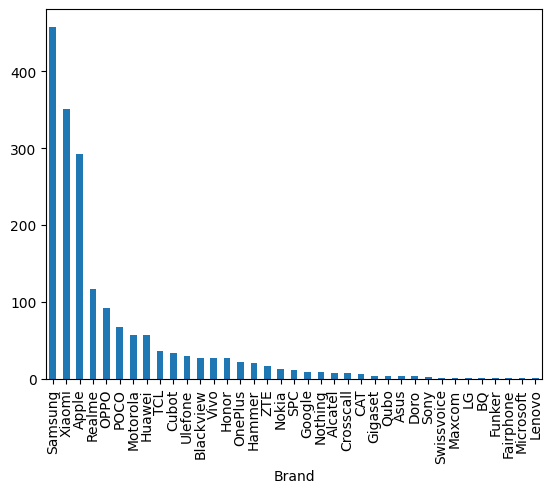

In [66]:
df['Brand'].value_counts().plot(kind='bar')

In [77]:
df.pop('Free')

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1811    Yes
1812    Yes
1813    Yes
1814    Yes
1815    Yes
Name: Free, Length: 1816, dtype: object

In [81]:
# Data preprocessing
label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Color'] = label_encoder.fit_transform(df['Color'])

X = df[['Brand', 'Model', 'RAM', 'Storage', 'Color']]
y = df['Final Price']

In [79]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)